Importing the required libraries

In [1]:
import numpy
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

load data

In [2]:
(x_train, y_train), (x_test, y_test)=mnist.load_data () #splitting the mnist data into train and test

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

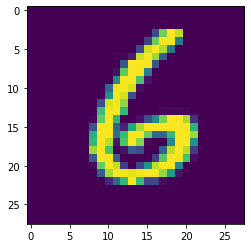

In [5]:
plt.imshow(x_train[6000])     #ploting the index=image

In [ ]:
np.argmax(y_train[6000])

0

Reshaping Dataset

In [9]:
#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

Applying One Hot Encoding

In [11]:
number_of_classes = 10  #storing the no of classes in a variable

In [12]:
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

Add CNN Layers

In [15]:
#create model
model=Sequential ()

In [16]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [17]:
#flatten the dimension of the image
model.add(Flatten())

In [18]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

Compiling the model

In [19]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [ ]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

Train the model

In [21]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 110s 58ms/step - loss: 0.1882 - accuracy: 0.9533 - val_loss: 0.0751 - val_accuracy: 0.9762
Epoch 2/5
1875/1875 [==============================] - 110s 59ms/step - loss: 0.0606 - accuracy: 0.9814 - val_loss: 0.0754 - val_accuracy: 0.9758
Epoch 3/5
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0470 - accuracy: 0.9845 - val_loss: 0.0925 - val_accuracy: 0.9753
Epoch 4/5
1875/1875 [==============================] - 111s 59ms/step - loss: 0.0336 - accuracy: 0.9891 - val_loss: 0.0781 - val_accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0302 - accuracy: 0.9907 - val_loss: 0.1067 - val_accuracy: 0.9782


Observing the metrics

In [22]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.10665197670459747, 0.9782000184059143]


Test The Model

In [23]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 71ms/step
[[3.5662453e-18 1.3220488e-22 5.7828655e-20 3.6040473e-10 6.7578981e-10
  7.9998215e-13 7.8929150e-19 1.9612942e-12 2.1346503e-11 1.0000000e+00]]


In [ ]:
plt.imshow(x_test[6000])

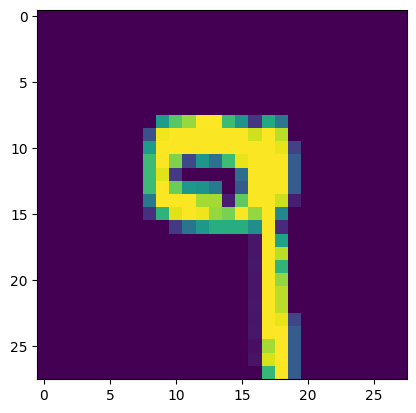

In [27]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[9]


Save The model

In [28]:
# Save the model
model.save('models/mnistCNN.h5')